In [18]:
#Blog=https://wordpress.com/view/furkanerguncansavruncs210.wordpress.com
import glob
from sklearn.linear_model import LinearRegression
import pandas as pd
import math
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join
import warnings 
warnings.simplefilter('ignore')

In [19]:
stocks = [f for f in glob.glob("Stocks/*.txt")]
#Gold dependent===>"Stocks/kgc.us.txt"
#Gold independent===>"Stocks/aamc.us.txt"
dataFrameList=[pd.read_csv(stocks[3])]
for i in range(len(dataFrameList)):
    dataFrameList[i]=dataFrameList[i].drop("OpenInt",axis=1)
    dataFrameList[i]["Date"]=pd.to_datetime(dataFrameList[i]["Date"])

In [20]:
goldDf=pd.read_csv("HistoricalQuotes _Gold.csv")
goldDf["date"]=pd.to_datetime(goldDf["date"])
goldDf.columns=["Date","Close","Volume","Open","High","Low"]
goldDf=goldDf.sort_values(by='Date', ascending=True)
goldDf=goldDf[dataFrameList[0].columns.tolist()]
goldDf=goldDf.reset_index(drop=True)

In [21]:
goldDf.head()

,Date,Open,High,Low,Close,Volume
0,2008-12-05,74.30,74.8100,72.91,74.520,13392230.0
1,2008-12-08,76.48,76.6200,75.40,76.195,7266957.0
2,2008-12-09,75.56,76.8500,75.30,76.330,9617588.0
3,2008-12-10,79.20,80.1099,78.56,79.750,16049730.0
4,2008-12-11,81.58,81.9400,80.49,80.650,13978800.0


In [22]:
dataFrameList[0].head()

,Date,Open,High,Low,Close,Volume
0,1996-04-12,1.05,1.79,1.02,1.38,408720000
1,1996-04-15,1.49,1.50,1.25,1.34,79231200
2,1996-04-16,1.34,1.34,1.17,1.20,48026400
3,1996-04-17,1.18,1.18,1.03,1.12,42871200
4,1996-04-18,1.25,1.25,1.17,1.22,27352800


In [23]:
print("The shape of gold data is:\n", goldDf.shape)
print("The shape of first stock data is:\n", dataFrameList[0].shape)
print()
print()
print("The type of gold data is:\n", goldDf.dtypes)
print("The type of first stock data is:\n", dataFrameList[0].dtypes)
print()
print()
print("The description of gold data is:\n", goldDf.describe())
print()
print()
print("The description of first stock data is:\n", dataFrameList[0].describe())

The shape of gold data is:
 (2517, 6)
The shape of first stock data is:
 (5434, 6)


The type of gold data is:
 Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object
The type of first stock data is:
 Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object


The description of gold data is:
               Open         High          Low        Close        Volume
count  2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03
mean    125.642665   126.242401   124.998518   125.640659  1.091762e+07
std      20.793875    20.882181    20.647774    20.785876  7.381535e+06
min      74.300000    74.810000    72.910000    74.520000  1.501552e+06
25%     113.960000   114.520000   113.550000   114.000000  6.272122e+06
50%     121.360000   121.880000   120.780000   121.310000 

# Does stock value of "a" increases with gold price
## Null hypothesis: Gold price is not relevant with stock price of the company

In [24]:
## Since the date interval of gold price is limited, stock value of company will be evaluated basis on the given date
def limitDates(firstDf, referenceDf):
    lastDate=referenceDf["Date"][0]
    firstDate=referenceDf["Date"][len(referenceDf)-1]
    if(firstDate>lastDate):
        firstDate, lastDate=lastDate, firstDate
    toBeReturn=firstDf[firstDf["Date"] >= firstDate]
    toBeReturn=toBeReturn[toBeReturn["Date"]<=lastDate]
    return toBeReturn

print(len(goldDf))
print(len(dataFrameList[0]))

2517
5434


In [25]:
for i in range(len(dataFrameList)):
    dataFrameList[i]=limitDates(dataFrameList[i],goldDf)
    dataFrameList[i]=dataFrameList[i].reset_index(drop=True)

goldDf=goldDf.reset_index(drop=True)
goldDf=limitDates(goldDf,dataFrameList[0])


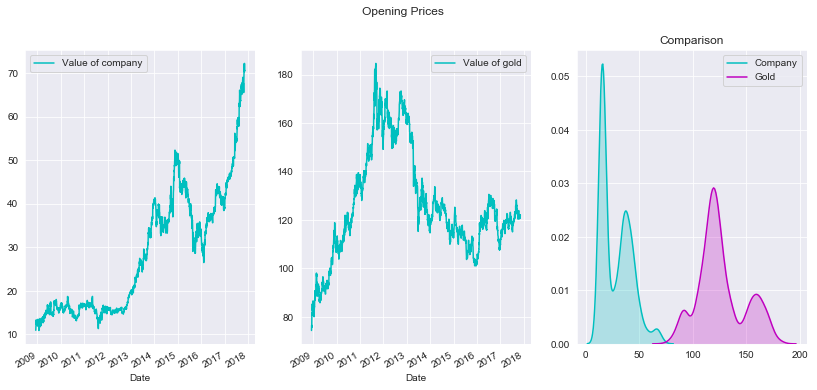

The pValue of Open price of both gold and company stock is:  0.0
The correlation coefficient of Open price of both gold and company stock is:  -0.255952910901108


In [26]:
fig, ax = plt.subplots(1, 3, figsize=(14,6)) 
dataFrameList[0].plot(x="Date",y="Open",ax=ax[0],color="c",label="Value of company")
goldDf.plot(x="Date",y="Open",ax=ax[1],color="c",label="Value of gold")
sns.kdeplot(dataFrameList[0]["Open"],shade=True, label="Company", ax=ax[2], color="c")
sns.kdeplot(goldDf["Open"], shade=True, label="Gold", ax=ax[2], color="m")
ax[2].set_title("Comparison")

plt.suptitle("Opening Prices")
plt.show()

print("The pValue of Open price of both gold and company stock is: ", stats.ttest_ind(dataFrameList[0]["Open"], goldDf["Open"])[1])
print("The correlation coefficient of Open price of both gold and company stock is: ", goldDf['Open'].corr(dataFrameList[0]['Open']))
# –0.50. A moderate downhill (negative) relationship

Company Open Price vs Gold Open Price


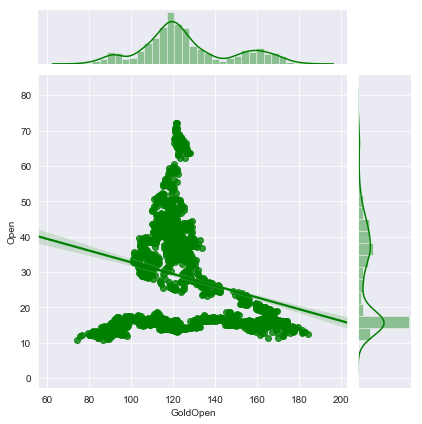

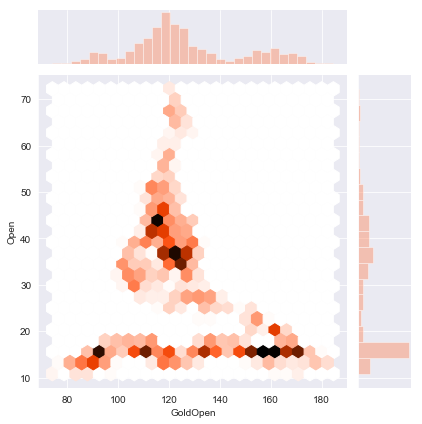

In [27]:
goldDf.columns=["Date","GoldOpen","GoldHigh","GoldLow","GoldClose","GoldVolume"]
joinedDf=pd.merge(goldDf, dataFrameList[0], on='Date', how='inner')

def getValue(time):
    return time.value
joinedDf["Value"]=joinedDf["Date"].apply(getValue)


print("Company Open Price vs Gold Open Price")
graph=sns.jointplot(x=joinedDf.GoldOpen, y=joinedDf.Open, kind="reg",color='green')
graph=sns.jointplot(x=joinedDf.GoldOpen, y=joinedDf.Open, kind="hex",color='coral')


In [28]:
from sklearn.model_selection import train_test_split
lr=LinearRegression()

X=joinedDf[["GoldOpen","GoldHigh","GoldLow","GoldClose","GoldVolume"]]
y=joinedDf[["Open"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [29]:
lr.fit(X_train, y_train)
#lr.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Company Open Price=a1*GoldOpen+a2*GoldHigh+a3*GoldLow+a4*GoldClose+a5*GoldVolume+a6 which are

In [30]:
for index, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][index]))
print("a6 is: ",lr.intercept_[0])

The coefficient for GoldOpen is 0.1158089104228153
The coefficient for GoldHigh is 0.8497577885436631
The coefficient for GoldLow is 0.8919184682791212
The coefficient for GoldClose is -1.9931229334312004
The coefficient for GoldVolume is -7.391138503421441e-07
a6 is:  53.99068847553944


In [31]:
print("The Score is: ",lr.score(X_test, y_test))

The Score is:  0.2606188146118471


In [32]:
from sklearn.metrics import mean_squared_error

y_predict = lr.predict(X_test)

lr_mse = mean_squared_error(y_predict, y_test)

print("The mean squared error is: ",lr_mse)

The mean squared error is:  139.697009653121
